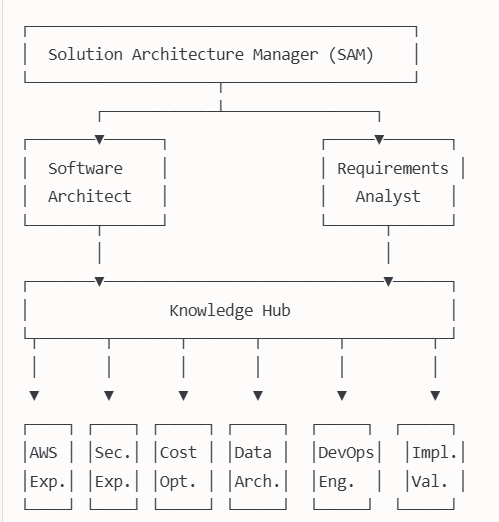

## To Do : 

* Check Crew AI documentation for complex architectures & needs and refine everything

* Remove the internet search from some tools

* How to attach the custom tools to the tasks & agents




* @tool("Architecture Diagram Generator")
* @tool("AWS Cost Estimator")
* @tool("IaC Template Generator")

## Current Architecture

In [8]:
from crewai_tools import SerperDevTool
from dotenv import load_dotenv

load_dotenv()
search_tool = SerperDevTool()

search_query = "latest advancements in artificial intelligence 2024"
search_results = search_tool.run(search_query=search_query)

# Print the results
print("Search Query:", search_query)
print("\nResults Summary:")
print(search_results)


Using Tool: Search the internet with Serper
Search Query: latest advancements in artificial intelligence 2024

Results Summary:
{'searchParameters': {'q': 'latest advancements in artificial intelligence 2024', 'type': 'search', 'num': 10, 'engine': 'google'}, 'organic': [{'title': '6 Game-Changing AI Breakthroughs That Defined 2024 - Forbes', 'link': 'https://www.forbes.com/sites/bernardmarr/2024/12/16/6-game-changing-ai-breakthroughs-that-defined-2024/', 'snippet': "From Apple's entry into generative AI to unprecedented achievements in robotics and art, 2024 marked a transformative year in artificial intelligence ...", 'position': 1}, {'title': 'Generative AI Developments & Trends in 2024: A Timeline', 'link': 'https://www.channelinsider.com/managed-services/generative-ai-developments-trends-year-in-review/', 'snippet': 'Discover key milestones and advancements in generative AI for 2024, highlighting innovations and trends that will shape the future of artificial intelligence.', 'posi

In [4]:
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import SerperDevTool
from crewai.tools import tool
from dotenv import load_dotenv
import re
import json

# Load environment variables for API keys
load_dotenv()

# Initialize tools
search_tool = SerperDevTool()


In [11]:
# Define the hierarchical manager agent
project_manager = Agent(
    role="Project Manager",
    goal="Orchestrate the creation of a detailed, implementation-ready AWS architecture and manage the specialist team",
    backstory=(
        "You are a seasoned technical project manager with 15+ years of experience leading complex AWS projects. "
        "You excel at coordinating specialist teams, synthesizing diverse inputs, and ensuring "
        "the final deliverable meets all customer requirements while maintaining practical "
        "implementability. You have a track record of delivering solutions on time and within budget."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)


# Define the requirements assessment agent
requirements_analyst = Agent(
    role="Requirements Analyst",
    goal="Analyze project requirements and determine technical needs for {use_case}",
    backstory=(
        "You are a senior technical business analyst who specializes in translating business "
        "requirements into technical specifications. You excel at identifying which "
        "technical aspects will be crucial for project success and can accurately analyze "
        "the technical implications of business requirements."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)


# Define the specialist agents (will be conditionally included based on requirements analysis)
software_architect = Agent(
    role="Software Architecture Specialist",
    goal="Design the optimal software architecture pattern for {use_case} before cloud implementation",
    backstory=(
        "You are an expert software architect with deep knowledge of architecture patterns (microservices, "
        "monolithic, serverless, event-driven, etc). You understand how to match business requirements to "
        "architectural approaches, considering factors like development velocity, team expertise, "
        "scalability needs, and integration complexity. You specialize in designing systems that can be "
        "effectively implemented on AWS."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

aws_expert = Agent(
    role="AWS Solution Specialist",
    goal="Recommend optimal AWS services and configurations for implementing {use_case}",
    backstory=(
        "You are an AWS-certified solutions architect with extensive hands-on experience. "
        "You have deep knowledge of AWS services, their limitations, pricing models, and best practices. "
        "You specialize in selecting the right AWS services that align with both technical requirements "
        "and business constraints, paying particular attention to the specific parameters of {use_case}."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

security_expert = Agent(
    role="Security & Compliance Architect",
    goal="Design secure AWS architectures that meet {security_tier} requirements and {compliance} standards",
    backstory=(
        "You are an AWS security specialist with certifications in security engineering and compliance. "
        "You understand how to implement defense-in-depth strategies across AWS services and have "
        "experience implementing architectures that satisfy regulatory requirements like {compliance}. "
        "You focus on practical security implementations rather than theoretical guidelines."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

cost_specialist = Agent(
    role="Cost Optimization Specialist",
    goal="Optimize the architecture for {cost_profile} while maintaining required performance",
    backstory=(
        "You specialize in AWS cost optimization with experience in FinOps practices. "
        "You understand how to balance performance requirements with cost constraints, "
        "identifying opportunities for reserved instances, spot fleets, graviton processors, "
        "and other cost-saving approaches. You have deep knowledge of AWS pricing models and "
        "can forecast costs for different implementation scenarios."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

data_architect = Agent(
    role="Data Flow Architect",
    goal="Design efficient data flows and storage solutions for {use_case}",
    backstory=(
        "You are a data architect specializing in designing scalable data pipelines and storage solutions. "
        "You understand AWS data services (RDS, DynamoDB, S3, Kinesis, etc.) and when to apply them. "
        "You excel at designing architectures that handle data efficiently while maintaining data integrity, "
        "considering aspects like data volume, velocity, and variety for {use_case}."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

devops_engineer = Agent(
    role="DevOps Specialist",
    goal="Design CI/CD pipelines and operational processes for {use_case} implementation",
    backstory=(
        "You are a DevOps expert with experience implementing Infrastructure as Code and CI/CD pipelines on AWS. "
        "You understand AWS deployment services (CodePipeline, CodeBuild, etc.) and operational tools "
        "(CloudWatch, X-Ray, etc.). You focus on creating automated, repeatable deployment processes "
        "that enable reliable operation of {use_case} solutions."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

integration_specialist = Agent(
    role="Integration Specialist",
    goal="Design integration architecture for {use_case} with {integration_complexity} requirements",
    backstory=(
        "You are an integration specialist with extensive experience connecting different systems and "
        "services. You excel at designing APIs, webhooks, event buses, and other integration patterns "
        "that enable seamless communication between application components and external systems. "
        "You understand how to balance performance, reliability, and complexity to create "
        "integration architectures that match the {integration_complexity} requirements."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

implementation_validator = Agent(
    role="Implementation Validator",
    goal="Critically review the proposed architecture against AWS best practices and specific requirements",
    backstory=(
        "You are an AWS Well-Architected Framework specialist who reviews architectures for alignment with "
        "best practices and specific requirements. You're skilled at identifying gaps, overengineering, "
        "and optimization opportunities in AWS designs. You provide actionable feedback that improves "
        "architectures while remaining practical for implementation."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

solution_architect = Agent(
    role="Solution Architecture Integrator",
    goal="Synthesize all specialist inputs into a comprehensive, implementation-ready architecture document for {use_case}",
    backstory=(
        "You are a Principal Solutions Architect with expertise in creating comprehensive AWS implementation guides. "
        "You excel at taking detailed inputs from various specialists and crafting them into a cohesive, comprehensive document "
        "that preserves each specialist's unique contributions while creating a coherent implementation guide. "
        "Your architecture documents are known for their clarity, completeness, practical implementability, "
        "and for faithfully representing the expertise and recommendations from each specialist domain."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

# Task 1: Initial Requirements Analysis
task_analyze_requirements = Task(
    description=(
        "As the first step in this architecture design process, analyze the complete set of project requirements to determine technical needs.\n\n"
        "STEP 1: Format the requirements as follows and analyze them:\n"
        "- use_case: {use_case}\n"
        "- performance: {performance}\n"
        "- availability: {availability}\n"
        "- security_tier: {security_tier}\n"
        "- compliance: {compliance}\n"
        "- cost_profile: {cost_profile}\n"
        "- implementation_time: {implementation_time}\n"
        "- required_expertise: {required_expertise}\n"
        "- scalability: {scalability}\n"
        "- ease_of_implementation: {ease_of_implementation}\n"
        "- integration_complexity: {integration_complexity}\n\n"

        "STEP 2: Provide a comprehensive analysis of the requirements, detailing the technical implications "
        "and challenges associated with implementing this system on AWS.\n\n"
        "STEP 3: Explicitly rate the following aspects on a scale of 1-5:\n"
        "1. software_architecture_complexity: How complex is the software architecture needs?\n"
        "2. security_requirements: How important are security and compliance?\n"
        "3. cost_optimization_needs: How critical is cost optimization?\n"
        "4. data_complexity: How complex are the data handling requirements?\n"
        "5. devops_complexity: How sophisticated are the deployment and operations needs?\n"
        "6. performance_requirements: How demanding are the performance needs?\n"
        "7. availability_requirements: How high are the availability requirements?\n"
        "8. integration_complexity: How complex are the integration requirements?\n\n"
        "For each area, provide a score from 1-5 where:\n"
        "1 = Not important/minimal requirements\n"
        "3 = Moderately important/standard requirements\n"
        "5 = Critically important/complex requirements\n\n"
        "YOUR RESPONSE MUST INCLUDE the complexity ratings in the following format (this is absolutely required):\n\n"
        "<assessment_scores>\n"
        "{\n"
        "  \"software_architecture_complexity\": X,\n"
        "  \"security_requirements\": X,\n"
        "  \"cost_optimization_needs\": X,\n"
        "  \"data_complexity\": X,\n"
        "  \"devops_complexity\": X,\n"
        "  \"performance_requirements\": X,\n"
        "  \"availability_requirements\": X,\n"
        "  \"integration_complexity\": X\n"
        "}\n"
        "</assessment_scores>\n"
    ),
    expected_output=(
        "A comprehensive requirements analysis that details the technical requirements, key challenges, "
        "and overall project complexity for implementing the {use_case} on AWS, with explicit complexity "
        "ratings (1-5) for each technical aspect enclosed in <assessment_scores> tags."
    ),
    agent=requirements_analyst
)

# Task 2: Project Planning and Team Coordination
task_project_planning = Task(
    description=(
        "Based on the requirements analysis from the Requirements Analyst, create a detailed project plan for developing "
        "the AWS architecture recommendation for {use_case}.\n\n"
        "IMPORTANT - EXECUTION PLAN:\n"
        "1. You MUST start by reviewing the output from task_analyze_requirements which contains complexity scores.\n"
        "2. Based on these complexity scores, you will decide which specialists to involve and in what order:\n\n"
        "Specialist assignment rules:\n"
        "- Always involve the AWS Solution Specialist for core service selection\n"
        "- If software_architecture_complexity >= 3, involve the Software Architecture Specialist before AWS service selection\n"
        "- If security_requirements >= 3, involve the Security & Compliance Architect after AWS service selection\n"
        "- If cost_optimization_needs >= 3, involve the Cost Optimization Specialist after AWS service selection\n"
        "- If data_complexity >= 3, involve the Data Flow Architect after AWS service selection\n"
        "- If devops_complexity >= 3, involve the DevOps Specialist after initial services are selected\n"
        "- If integration_complexity >= 3, involve the Integration Specialist after core services are defined\n"
        "- Always involve the Implementation Validator for architecture validation near the end\n"
        "- Always involve the Solution Architecture Integrator for final synthesis\n\n"
        "For specialists with scores < 3, explain why they won't be deeply involved, but you can assign them lightweight consulting roles if needed.\n\n"
        "The plan should include:\n"
        "1. Team composition - which specialists will be involved based on the complexity scores\n"
        "2. Work breakdown structure - what tasks each specialist will perform\n"
        "3. Dependencies between specialist tasks\n"
        "4. Integration points where specialist outputs will be combined\n"
        "5. Timeline for the architecture development process\n"
        "6. Key deliverables expected from each specialist\n\n"
        "Also include a coordination plan detailing how you will manage the specialist team to ensure "
        "their outputs align and integrate properly into a cohesive architecture document."
    ),
    expected_output=(
        "A detailed project plan with team composition based on complexity scores, work breakdown structure, task dependencies, "
        "integration points, timeline, and key deliverables, plus a coordination strategy. This will guide the execution flow."
    ),
    agent=project_manager,
    context=[task_analyze_requirements]
)

# Task 3: Software Architecture Design (Conditional)
task_design_software_architecture = Task(
    description=(
        "Design the optimal software architecture pattern for {use_case} based on the requirements analysis.\n"
        "Consider whether the solution should use:\n"
        "1. Monolithic architecture vs. microservices\n"
        "2. Serverless vs. container-based approaches\n"
        "3. Event-driven vs. request-response patterns\n"
        "4. Data storage approaches (SQL, NoSQL, data lake)\n"
        "5. Integration patterns with existing systems\n\n"
        "Use the search tool to conduct multiple specific searches for each decision point, such as:\n"
        "- \"microservices vs monolithic for {use_case} with {performance} performance needs\"\n"
        "- \"serverless architecture patterns for {use_case} with {scalability} scalability requirements\"\n"
        "- \"event-driven architecture for {use_case} with {integration_complexity} integration needs\"\n\n"
        "Important: Make separate, focused searches for each architectural decision rather than one general search.\n\n"
        "For each architectural decision:\n"
        "1. Explain the rationale based on specific requirements\n"
        "2. Identify implications for AWS implementation\n"
        "3. Describe how it addresses {performance}, {scalability}, and {ease_of_implementation} needs\n"
        "4. Detail how it aligns with {required_expertise} expertise level\n\n"
        "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<software_architecture>\n"
        "# Pattern Decision\n"
        "- Selected Pattern: [Pattern name]\n"
        "- Rationale: [Brief explanation]\n"
        "- AWS Implementation Impact: [Key considerations]\n"
        "\n"
        "# Component Structure\n"
        "- Component 1: [Purpose and function]\n"
        "- Component 2: [Purpose and function]\n"
        "\n"
        "# Data Flow\n"
        "- Flow 1: [Source → Destination, purpose]\n"
        "- Flow 2: [Source → Destination, purpose]\n"
        "\n"
        "# Integration Points\n"
        "- Integration 1: [System, method, purpose]\n"
        "- Integration 2: [System, method, purpose]\n"
        "\n"
        "# Requirement Alignment\n"
        "- Performance: [How architecture addresses this]\n"
        "- Scalability: [How architecture addresses this]\n"
        "- Implementation: [How architecture addresses this]\n"
        "</software_architecture>\n"
    ),
    expected_output=(
        "A structured software architecture design document enclosed in <software_architecture> tags that includes "
        "the selected architectural patterns with rationale, component structure, data flows, integration points, "
        "and alignment with key requirements."
    ),
    agent=software_architect,
    context=[task_analyze_requirements, task_project_planning],
    tools=[search_tool]
)

# Task 4: AWS Service Selection
task_aws_service_selection = Task(
    description=(
        "Based on the project requirements and software architecture design, select the optimal AWS services to implement {use_case}.\n"
        "For each component in the architecture:\n"
        "1. Use the search tool to search for AWS service recommendations with specific requirements, such as:\n"
        "   - \"high-performance database for {use_case} with {performance} needs and {availability} availability\"\n"
        "   - \"compute solution for {use_case} with {scalability} scalability requirements\"\n"
        "   - \"storage solution for {use_case} with {cost_profile} cost profile\"\n\n"
        "2. Important: Make separate, focused searches for each major component rather than one general search.\n\n"
        "3. For each AWS service recommended:\n"
        "   - Detail specific instance types, sizes, and configurations to meet requirements\n"
        "   - Explain how it integrates with other selected services\n"
        "   - Identify any alternatives considered and why they were rejected\n"
        "   - Provide sizing and capacity recommendations based on the use case scale\n\n"
        "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<aws_services>\n"
        "# Compute Services\n"
        "- Service: [Name]\n"
        "- Configuration: [Instance type/size/settings]\n"
        "- Purpose: [What it handles]\n"
        "- Alternatives Rejected: [Name, reason]\n"
        "\n"
        "# Database Services\n"
        "- Service: [Name]\n"
        "- Configuration: [Instance type/size/settings]\n"
        "- Purpose: [What it handles]\n"
        "- Alternatives Rejected: [Name, reason]\n"
        "\n"
        "# Storage Services\n"
        "- Service: [Name]\n"
        "- Configuration: [Settings]\n"
        "- Purpose: [What it handles]\n"
        "- Alternatives Rejected: [Name, reason]\n"
        "\n"
        "# Networking Services\n"
        "- Service: [Name]\n"
        "- Configuration: [Settings]\n"
        "- Purpose: [What it handles]\n"
        "- Alternatives Rejected: [Name, reason]\n"
        "\n"
        "# Integration Services\n"
        "- Service: [Name]\n"
        "- Configuration: [Settings]\n"
        "- Purpose: [What it handles]\n"
        "- Alternatives Rejected: [Name, reason]\n"
        "</aws_services>\n"
    ),
    expected_output=(
        "A structured AWS service selection document enclosed in <aws_services> tags that includes "
        "specific AWS services organized by category, with detailed configurations, purposes, and "
        "alternatives considered for each service category."
    ),
    agent=aws_expert,
    context=[task_analyze_requirements, task_project_planning, task_design_software_architecture],
    tools=[search_tool]
)

# Task 5: Security & Compliance Architecture (Conditional)
task_security_architecture = Task(
    description=(
        "Design the security architecture for the {use_case} implementation to meet {security_tier} and {compliance} requirements.\n"
        "For each AWS service in the proposed architecture:\n"
        "1. Define IAM roles, policies, and permissions using least privilege principles\n"
        "2. Design network security with security groups, NACLs, and VPC architecture\n"
        "3. Specify encryption requirements for data at rest and in transit\n"
        "4. Detail authentication and authorization mechanisms\n"
        "5. Design logging, monitoring, and alerting for security events\n"
        "6. Document how the architecture meets {compliance} requirements\n\n"
        "Use the search tool to find specific information about AWS security best practices for each service and compliance requirement.\n\n"
        "Include specific configurations and policies required for implementation."
        "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<security_architecture>\n"
        "# IAM Configuration\n"
        "- Roles: [List with purposes]\n"
        "- Policies: [Key policies with brief JSON examples]\n"
        "- Permission Boundaries: [Description]\n"
        "\n"
        "# Network Security\n"
        "- VPC Design: [Configuration details]\n"
        "- Security Groups: [Key rules]\n"
        "- NACLs: [Key rules]\n"
        "- WAF Configuration: [If applicable]\n"
        "\n"
        "# Data Protection\n"
        "- Encryption at Rest: [Methods for each service]\n"
        "- Encryption in Transit: [Methods]\n"
        "- Key Management: [KMS details]\n"
        "\n"
        "# Authentication & Authorization\n"
        "- User Authentication: [Methods]\n"
        "- Service Authentication: [Methods]\n"
        "- Authorization Controls: [Methods]\n"
        "\n"
        "# Monitoring & Logging\n"
        "- CloudTrail Configuration: [Settings]\n"
        "- CloudWatch Alarms: [Key alarms]\n"
        "- Security Event Monitoring: [Approach]\n"
        "\n"
        "# Compliance Mapping\n"
        "- {compliance} Requirement 1: [Implementation]\n"
        "- {compliance} Requirement 2: [Implementation]\n"
        "</security_architecture>\n"
    ),
    expected_output=(
        "A structured security architecture document enclosed in <security_architecture> tags that includes "
        "detailed IAM configurations, network security design, data protection measures, authentication and "
        "authorization mechanisms, monitoring approach, and compliance mapping."
    ),
    agent=security_expert,
    context=[task_analyze_requirements, task_project_planning, task_design_software_architecture, task_aws_service_selection],
    tools=[search_tool]
)

# Task 6: Cost Optimization Design (Conditional)
task_cost_optimization = Task(
    description=(
        "Optimize the proposed AWS architecture for {cost_profile} requirements while maintaining {performance} and {availability} needs.\n"
        "For each AWS service in the architecture:\n"
        "1. Recommend specific pricing models (on-demand, reserved, savings plans, spot)\n"
        "2. Suggest cost-effective instance types and sizes\n"
        "3. Design auto-scaling approaches to optimize costs\n"
        "4. Identify opportunities for serverless implementations to reduce costs\n"
        "5. Design data transfer optimization to minimize network costs\n"
        "6. Recommend operational practices for cost control\n\n"
        "Use the search tool to find specific cost optimization recommendations for each AWS service in your architecture.\n\n"
                "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<cost_optimization>\n"
        "# Pricing Models\n"
        "- Compute: [On-demand/Reserved/Savings Plans/Spot recommendations]\n"
        "- Storage: [Pricing tier recommendations]\n"
        "- Database: [Pricing model recommendations]\n"
        "- Network: [Pricing considerations]\n"
        "\n"
        "# Instance Optimizations\n"
        "- Compute Right-sizing: [Recommendations]\n"
        "- Storage Right-sizing: [Recommendations]\n"
        "- Database Right-sizing: [Recommendations]\n"
        "\n"
        "# Auto-scaling Design\n"
        "- Scaling Policies: [Configurations]\n"
        "- Schedule-based Scaling: [If applicable]\n"
        "- Predictive Scaling: [If applicable]\n"
        "\n"
        "# Serverless Opportunities\n"
        "- Function 1: [Service, purpose, cost benefit]\n"
        "- Function 2: [Service, purpose, cost benefit]\n"
        "\n"
        "# Cost Control\n"
        "- Budgets: [Recommendations]\n"
        "- Cost Allocation Tags: [Strategy]\n"
        "- Governance Controls: [Recommendations]\n"
        "\n"
        "# Monthly Cost Estimate\n"
        "- Compute: [Est. cost]\n"
        "- Storage: [Est. cost]\n"
        "- Database: [Est. cost]\n"
        "- Network: [Est. cost]\n"
        "- Other Services: [Est. cost]\n"
        "- Total Monthly: [Est. cost]\n"
        "</cost_optimization>\n"
    ),
    expected_output=(
        "A structured cost optimization plan enclosed in <cost_optimization> tags that includes "
        "specific pricing model recommendations, instance optimizations, auto-scaling design, "
        "serverless opportunities, cost control measures, and detailed monthly cost estimates."
    ),
    agent=cost_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 7: Data Architecture Design (Conditional)
task_data_architecture = Task(
    description=(
        "Design the data architecture for {use_case} that optimizes data flow, storage, and processing.\n"
        "For the proposed AWS implementation:\n"
        "1. Define data models and schema designs for all data stores\n"
        "2. Design data ingestion, processing, and analytics pipelines\n"
        "3. Specify data retention, backup, and disaster recovery approaches\n"
        "4. Detail data security and privacy implementations for {compliance}\n"
        "5. Design caching strategies for {performance} requirements\n"
        "6. Optimize data storage for {cost_profile} requirements\n\n"
        "Use the search tool to research best practices for data architecture in AWS for your specific use case and requirements.\n\n"
           "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<data_architecture>\n"
        "# Data Models\n"
        "- Entity 1: [Key attributes, relationships]\n"
        "- Entity 2: [Key attributes, relationships]\n"
        "\n"
        "# Storage Solutions\n"
        "- Primary Database: [Service, configuration, purpose]\n"
        "- Secondary Database: [Service, configuration, purpose]\n"
        "- Object Storage: [Service, configuration, purpose]\n"
        "- Caching Layer: [Service, configuration, purpose]\n"
        "\n"
        "# Data Pipelines\n"
        "- Ingestion Pipeline: [Services, flow]\n"
        "- Processing Pipeline: [Services, flow]\n"
        "- Analytics Pipeline: [Services, flow]\n"
        "\n"
        "# Backup & Recovery\n"
        "- Backup Strategy: [Method, frequency]\n"
        "- Retention Policy: [Details]\n"
        "- Recovery Process: [Steps, RTO/RPO]\n"
        "\n"
        "# Data Security\n"
        "- Access Controls: [Methods]\n"
        "- Encryption: [Methods]\n"
        "- Compliance Controls: [For {compliance}]\n"
        "\n"
        "# Performance Optimization\n"
        "- Caching Strategy: [Details]\n"
        "- Read/Write Optimization: [Methods]\n"
        "- Query Optimization: [Methods]\n"
        "</data_architecture>\n"
    ),
    expected_output=(
        "A structured data architecture document enclosed in <data_architecture> tags that includes "
        "detailed data models, storage solutions, data pipeline designs, backup and recovery strategies, "
        "data security measures, and performance optimization approaches."
    ),
    agent=data_architect,
    context=[task_analyze_requirements, task_project_planning, task_design_software_architecture, task_aws_service_selection, task_security_architecture],
    tools=[search_tool]
)

# Task 8: DevOps & Implementation Plan (Conditional)
task_devops_implementation = Task(
    description=(
        "Design the DevOps processes and implementation plan for deploying {use_case} within {implementation_time} timeline.\n"
        "For the proposed AWS architecture:\n"
        "1. Create Infrastructure as Code templates (CloudFormation or Terraform)\n"
        "2. Design CI/CD pipeline for automated deployment\n"
        "3. Define monitoring, alerting, and logging strategy\n"
        "4. Create runbooks for common operational procedures\n"
        "5. Detail implementation phases and timeline\n"
        "6. Specify required team resources and skills\n\n"
        "Use the search tool to research DevOps best practices and implementation patterns specific to your AWS architecture.\n\n"
        "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<devops_implementation>\n"
        "# Infrastructure as Code\n"
        "- Tool Selection: [CloudFormation/Terraform]\n"
        "- Template Structure: [Organization approach]\n"
        "- Key Components: [List with sample code snippets]\n"
        "\n"
        "# CI/CD Pipeline\n"
        "- Services: [CodePipeline/GitHub Actions/etc.]\n"
        "- Pipeline Stages: [List with configurations]\n"
        "- Testing Strategy: [Approaches]\n"
        "- Deployment Strategy: [Blue-green/Canary/etc.]\n"
        "\n"
        "# Monitoring & Alerting\n"
        "- CloudWatch Dashboards: [Key metrics]\n"
        "- CloudWatch Alarms: [Key thresholds]\n"
        "- Log Management: [Approach]\n"
        "- Notification Strategy: [Methods]\n"
        "\n"
        "# Operational Runbooks\n"
        "- Deployment Procedure: [Steps]\n"
        "- Rollback Procedure: [Steps]\n"
        "- Incident Response: [Steps]\n"
        "- Routine Maintenance: [Steps]\n"
        "\n"
        "# Implementation Timeline\n"
        "- Phase 1: [Tasks, duration]\n"
        "- Phase 2: [Tasks, duration]\n"
        "- Phase 3: [Tasks, duration]\n"
        "\n"
        "# Team Resources\n"
        "- Roles Required: [List]\n"
        "- Skill Requirements: [List]\n"
        "- Estimated Effort: [Person-months]\n"
        "</devops_implementation>\n"
    ),
    expected_output=(
        "A structured DevOps implementation plan enclosed in <devops_implementation> tags that includes "
        "detailed Infrastructure as Code approach, CI/CD pipeline design, monitoring and alerting strategy, "
        "operational runbooks, implementation timeline, and team resource requirements."
    ),
    agent=devops_engineer,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 9: Design Integration Architecture
task_integration_architecture = Task(
    description=(
        "Design the integration architecture for {use_case} with {integration_complexity} complexity requirements.\n"
        "For the proposed AWS implementation:\n"
        "1. Define APIs, webhooks, and event patterns needed for system integration\n"
        "2. Specify AWS services for integration (API Gateway, EventBridge, etc.)\n"
        "3. Design authentication and authorization for integration points\n"
        "4. Create message schemas and contracts for system communication\n"
        "5. Detail error handling and retry strategies\n"
        "6. Define monitoring approach for integration points\n\n"
        "Use the search tool to research integration patterns and AWS services that are appropriate for your specific integration requirements.\n\n"
        "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<integration_architecture>\n"
        "# API Design\n"
        "- API Gateway Configuration: [Settings]\n"
        "- Endpoint 1: [Path, method, purpose, sample request/response]\n"
        "- Endpoint 2: [Path, method, purpose, sample request/response]\n"
        "\n"
        "# Event Architecture\n"
        "- EventBridge Configuration: [Settings]\n"
        "- Event Pattern 1: [Source, detail, purpose]\n"
        "- Event Pattern 2: [Source, detail, purpose]\n"
        "\n"
        "# Authentication & Authorization\n"
        "- API Authentication: [Methods]\n"
        "- Service Authentication: [Methods]\n"
        "- Authorization Controls: [Methods]\n"
        "\n"
        "# Message Schemas\n"
        "- Schema 1: [Purpose, key fields, sample]\n"
        "- Schema 2: [Purpose, key fields, sample]\n"
        "\n"
        "# Error Handling\n"
        "- Retry Strategy: [Pattern, limits]\n"
        "- Dead Letter Queues: [Configuration]\n"
        "- Failure Notification: [Method]\n"
        "\n"
        "# Integration Monitoring\n"
        "- Key Metrics: [List]\n"
        "- API Logging: [Approach]\n"
        "- Transaction Tracing: [Method]\n"
        "</integration_architecture>\n"
    ),
    expected_output=(
        "A structured integration architecture document enclosed in <integration_architecture> tags that includes "
        "detailed API design, event architecture, authentication and authorization mechanisms, message schemas, "
        "error handling strategies, and integration monitoring approach."
    ),
    agent=integration_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)


# Task 10: Progress Review and Integration (Manager Task)
task_progress_review = Task(
    description=(
        "Review the outputs from all specialist teams and identify any gaps, inconsistencies, or integration issues.\n"
        "For each specialist deliverable:\n"
        "1. Ensure it aligns with the original requirements for {use_case}\n"
        "2. Verify it integrates properly with other specialist outputs\n"
        "3. Identify any missing details or inconsistencies\n"
        "4. Provide feedback to specialists for revisions if needed\n\n"
        "Also evaluate overall progress against the project plan and timeline, making adjustments as necessary."
    ),
    expected_output=(
        "A comprehensive progress review report that identifies integration issues, gaps, and inconsistencies, "
        "with specific feedback for each specialist and revised project plan if needed."
    ),
    agent=project_manager,
    context=[
        task_analyze_requirements, 
        task_project_planning, 
        task_design_software_architecture,
        task_aws_service_selection, 
        task_security_architecture, 
        task_cost_optimization, 
        task_data_architecture, 
        task_devops_implementation,
        task_integration_architecture
    ])

# Task 11: Architecture Validation
task_architecture_validation = Task(
    description=(
        "Validate the complete architecture against AWS Well-Architected Framework principles and specific requirements for {use_case}.\n"
        "For the proposed architecture:\n"
        "1. Evaluate operational excellence aspects\n"
        "2. Validate security implementation against {security_tier} requirements\n"
        "3. Assess reliability for meeting {availability} needs\n"
        "4. Review performance efficiency for {performance} requirements\n"
        "5. Analyze cost optimization for {cost_profile}\n"
        "6. Verify implementation feasibility for {required_expertise} team\n\n"
        "Use the search tool to research AWS Well-Architected Framework principles and best practices specific to your architecture components.\n\n"
        "Identify specific improvements with implementation details."
        "\n\n"
        "STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:\n"
        "<architecture_validation>\n"
        "# Operational Excellence\n"
        "- Score: [1-5]\n"
        "- Strengths: [List]\n"
        "- Gaps: [List]\n"
        "- Recommendations: [List]\n"
        "\n"
        "# Security\n"
        "- Score: [1-5]\n"
        "- Strengths: [List]\n"
        "- Gaps: [List]\n"
        "- Recommendations: [List]\n"
        "\n"
        "# Reliability\n"
        "- Score: [1-5]\n"
        "- Strengths: [List]\n"
        "- Gaps: [List]\n"
        "- Recommendations: [List]\n"
        "\n"
        "# Performance Efficiency\n"
        "- Score: [1-5]\n"
        "- Strengths: [List]\n"
        "- Gaps: [List]\n"
        "- Recommendations: [List]\n"
        "\n"
        "# Cost Optimization\n"
        "- Score: [1-5]\n"
        "- Strengths: [List]\n"
        "- Gaps: [List]\n"
        "- Recommendations: [List]\n"
        "\n"
        "# Implementation Feasibility\n"
        "- Score: [1-5]\n"
        "- Risks: [List]\n"
        "- Mitigations: [List]\n"
        "</architecture_validation>\n"
    ),
    expected_output=(
        "A structured architecture validation report enclosed in <architecture_validation> tags that includes "
        "scores, strengths, gaps, and recommendations for each pillar of the AWS Well-Architected Framework, "
        "plus implementation feasibility assessment with risks and mitigations."
    ),
    agent=implementation_validator,
    context=[task_aws_service_selection, task_progress_review],
    tools=[search_tool]
)

# Task 12: Final Architecture Synthesis
task_final_synthesis = Task(
    description=(
        "Synthesize all architectural inputs into a comprehensive, implementation-ready AWS architecture document for {use_case}.\n\n"
        "IMPORTANT: Focus on creating a SPECIFIC and IMPLEMENTABLE architecture document with CONCRETE recommendations.\n\n"
        "The document must include:\n\n"
        "1. Executive Summary\n"
        "   - Brief overview of requirements and approach\n"
        "   - Key architecture decisions summary\n\n"
        
        "2. Architecture Overview\n"
        "   - High-level architecture diagram description\n"
        "   - Core components and their relationships\n\n"
        
        "3. AWS Service Implementation\n"
        "   - SPECIFIC services with exact configurations\n"
        "   - Instance types, sizes, and settings\n\n"
        
        "4. Security Implementation\n"
        "   - Concrete security controls and configurations\n"
        "   - Specific {compliance} implementation details\n\n"
        
        "5. Cost Details\n"
        "   - Specific pricing models and estimated costs\n"
        "   - Cost optimization strategies\n\n"
        
        "6. Implementation Plan\n"
        "   - Phased deployment approach\n"
        "   - Timeline and resource requirements\n\n"
        
        "CRITICAL REQUIREMENTS:\n"
        "1. BE SPECIFIC - Include actual service names, instance types, and configurations\n"
        "2. BE CONCRETE - Provide implementable details, not generalizations\n"
        "3. FOCUS ON TECHNICAL SPECIFICATIONS - This is a technical architecture document\n"
        "4. BE THOROUGH - Not just summary\n"
    ),
    expected_output=(
        "A comprehensive and SPECIFIC AWS architecture document with concrete implementation details "
        "including exact services, configurations, security controls, and deployment steps. "
        "The document must be technically detailed and immediately implementable, not a general overview."
    ),
    agent=solution_architect,
    context=[
        task_analyze_requirements, 
        task_project_planning, 
        task_aws_service_selection, 
        task_security_architecture, 
        task_cost_optimization,
        task_data_architecture,
        task_devops_implementation,
        task_integration_architecture,
        task_architecture_validation
    ]
)


def create_aws_architecture_recommendation(requirements):
    """
    Runs the CrewAI process to create an AWS architecture recommendation
    with all specialists included and the project manager controlling the process flow
    """
    # Package input parameters for easier passing
    use_case_params = {
        "use_case": requirements.get("use_case"),
        "performance": requirements.get("performance"),
        "availability": requirements.get("availability"),
        "security_tier": requirements.get("security_tier"),
        "compliance": ", ".join(requirements.get("compliance", [])) if isinstance(requirements.get("compliance"), list) else requirements.get("compliance", ""),
        "cost_profile": requirements.get("cost_profile"),
        "implementation_time": requirements.get("implementation_time"),
        "required_expertise": requirements.get("required_expertise"),
        "scalability": requirements.get("scalability"),
        "ease_of_implementation": requirements.get("ease_of_implementation"),
        "integration_complexity": requirements.get("integration_complexity", "Moderate")
    }
    
    # Create a single crew with all agents and tasks
    crew = Crew(
        agents=[
            project_manager, 
            requirements_analyst,
            software_architect, 
            aws_expert, 
            security_expert, 
            cost_specialist, 
            data_architect, 
            devops_engineer, 
            integration_specialist, 
            implementation_validator, 
            solution_architect
        ],
        tasks=[
            task_analyze_requirements,
            task_project_planning,
            task_design_software_architecture,
            task_aws_service_selection,
            task_security_architecture,
            task_cost_optimization,
            task_data_architecture,
            task_devops_implementation,
            task_integration_architecture,
            task_progress_review,
            task_architecture_validation,
            task_final_synthesis
        ],
        process=Process.hierarchical,
        manager=project_manager,
        manager_llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434"),
        verbose=True
    )
    
    print("Running AWS architecture design process with project manager coordination...")
    result = crew.kickoff(inputs=use_case_params)



    task_outputs = {
        "requirements_analysis": task_analyze_requirements.output.raw if hasattr(task_analyze_requirements, 'output') else None,
        "project_planning": task_project_planning.output.raw if hasattr(task_project_planning, 'output') else None,
        "software_architecture": task_design_software_architecture.output.raw if hasattr(task_design_software_architecture, 'output') else None,
        "aws_service_selection": task_aws_service_selection.output.raw if hasattr(task_aws_service_selection, 'output') else None,
        "security_architecture": task_security_architecture.output.raw if hasattr(task_security_architecture, 'output') else None,
        "cost_optimization": task_cost_optimization.output.raw if hasattr(task_cost_optimization, 'output') else None,
        "data_architecture": task_data_architecture.output.raw if hasattr(task_data_architecture, 'output') else None,
        "devops_implementation": task_devops_implementation.output.raw if hasattr(task_devops_implementation, 'output') else None,
        "integration_architecture": task_integration_architecture.output.raw if hasattr(task_integration_architecture, 'output') else None,
        "progress_review": task_progress_review.output.raw if hasattr(task_progress_review, 'output') else None,
        "architecture_validation": task_architecture_validation.output.raw if hasattr(task_architecture_validation, 'output') else None,
        "final_synthesis": task_final_synthesis.output.raw if hasattr(task_final_synthesis, 'output') else None
    }
    
    # Print the output of each task
    print("\n=== TASK OUTPUTS ===")
    print("\n--- Requirements Analysis ---")
    print(task_outputs["requirements_analysis"])
    
    print("\n--- Project Planning ---")
    print(task_outputs["project_planning"])
    
    print("\n--- Software Architecture Design ---")
    print(task_outputs["software_architecture"])
    
    print("\n--- AWS Service Selection ---")
    print(task_outputs["aws_service_selection"])
    
    print("\n--- Security Architecture ---")
    print(task_outputs["security_architecture"])
    
    print("\n--- Cost Optimization ---")
    print(task_outputs["cost_optimization"])
    
    print("\n--- Data Architecture ---")
    print(task_outputs["data_architecture"])
    
    print("\n--- DevOps Implementation ---")
    print(task_outputs["devops_implementation"])
    
    print("\n--- Integration Architecture ---")
    print(task_outputs["integration_architecture"])
    
    print("\n--- Progress Review ---")
    print(task_outputs["progress_review"])
    
    print("\n--- Architecture Validation ---")
    print(task_outputs["architecture_validation"])
    
    print("\n=== FINAL ARCHITECTURE SYNTHESIS ===")
    print(task_outputs["final_synthesis"])
    
    return {
        "architecture_recommendation": result,
        "task_outputs": task_outputs
    }

# Example usage
if __name__ == "__main__":
    use_case_requirements = {
        "use_case": "e-commerce platform with 1M monthly users",
        "performance": "high",
        "availability": "99.99%",
        "security_tier": "high",
        "compliance": ["PCI-DSS"],
        "cost_profile": "balanced",
        "implementation_time": "3 months",
        "required_expertise": "intermediate",
        "scalability": "high",
        "ease_of_implementation": "medium",
        "integration_complexity": "Moderate"
    }
    
    # Pass the requirements dictionary directly to the function
    result = create_aws_architecture_recommendation(use_case_requirements)

    print("\n=== ARCHITECTURE RECOMMENDATION ===")
    print(result["architecture_recommendation"])

Running AWS architecture design process with project manager coordination...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 4832ef42-50ce-4175-a67d-62563aa77d08                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: As the first step in this architecture design process, analyze the complete set of project requirements to determine technical needs.

STEP 1: Format the requirements as follows and analyze them:
- use_case: e-commerce platform with 1M monthly users
- performance: high
- availability: 99.99%
- security_tier: high
- compliance: PCI-DSS
- cost_profile: balanced
- implementation_time: 3 months
- required_expertise: intermediate
- scalability: high
- ease_of_implementation: medium
- integration_complexity: Moderate

STEP 2: Provide a comprehensive analysis of the requirements, detailing the technical implications and challenges associated with implementing this system on AWS.

STEP 3: Explicitly rate the following aspects on a scale of 1-5:
1. software_architecture_complexity: How complex is the software architecture needs?
2. security_requirements: How important are security and compliance?
3. cost_optimization_needs: How critical is cost optimization?
4. da

🤖 Agent: Crew Manager
    Status: In Progress

🚀 Crew: crew
└── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

# Agent: Requirements Analyst
## Task: Analyze the formatted requirements for the e-commerce platform


# Agent: Requirements Analyst
## Final Answer: 
To analyze the requirements for the e-commerce platform with 1M monthly users, we need to break down the key criteria into technical specifications that can guide the development and implementation process. The platform's success hinges on several critical factors including performance, availability, security, compliance, cost, scalability, ease of implementation, and integration complexity.

1. **High Performance**: To ensure high performance for 1M monthly users, the platform should be built using scalable technologies such as cloud services (AWS, Azure, Google Cloud) that can dynamically adjust resources according to traffic demands. Leveraging content delivery networks (CDNs), caching mechanisms (like Redis or Memcached), and optimizing database queries will also enhance user experience by reducing page load times.

2. **99.99% Avai

🚀 Crew: crew
└── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed



# Agent: Crew Manager
## Thought: Thought: To analyze the requirements for the e-commerce platform, I need to understand the technical implications and challenges associated with implementing this system on AWS. The first step is to format the requirements and then provide a comprehensive analysis.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Analyze the formatted requirements for the e-commerce platform\", \"context\": \"The project requires an e-commerce platform with 1M monthly users, high performance, 99.99% availability, high security tier, PCI-DSS compliance, balanced cost profile, 3 months implementation time, intermediate required expertise, high scalability, medium ease of implementation, and moderate integration complexity.\", \"coworker\": \"Requirements Analyst\"}"
## Tool Output: 
To analyze the requirements for the e-commerce platform with 1M monthly users, we need to break down the key criteria into technical specifications that can guide the 

🤖 Agent: Requirements Analyst
    Status: ✅ Completed
└── 🧠 Thinking...

🤖 Agent: Requirements Analyst
    Status: ✅ Completed



# Agent: Crew Manager
## Final Answer: 
<assessment>
To analyze the requirements for the e-commerce platform with 1M monthly users, we need to break down the key criteria into technical specifications that can guide the development and implementation process. The platform's success hinges on several critical factors including performance, availability, security, compliance, cost, scalability, ease of implementation, and integration complexity.


### Key Considerations

1. **High Performance**: To ensure high performance for 1M monthly users, the platform should be built using scalable technologies such as cloud services (AWS) that can dynamically adjust resources according to traffic demands. Leveraging content delivery networks (CDNs), caching mechanisms (like Redis or Memcached), and optimizing database queries will also enhance user experience by reducing page load times.

2. **99.99% Availability**: Achieving 99.99% availability requires a robust infrastructure with redundancy in

🚀 Crew: crew
└── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
       Assigned to: Crew Manager
       Status: ✅ Completed
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 9bec9532-682b-4859-8ac7-83e058cab71b                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Based on the requirements analysis from the Requirements Analyst, create a detailed project plan for developing the AWS architecture recommendation for e-commerce platform with 1M monthly users.

IMPORTANT - EXECUTION PLAN:
1. You MUST start by reviewing the output from task_analyze_requirements which contains complexity scores.
2. Based on these complexity scores, you will decide which specialists to involve and in what order:

Specialist assignment rules:
- Always involve the AWS Solution Specialist for core service selection
- If software_architecture_complexity >= 3, involve the Software Architecture Specialist before AWS service selection
- If security_requirements >= 3, involve the Security & Compliance Architect after AWS service selection
- If cost_optimization_needs >= 3, involve the Cost Optimization Specialist after AWS service selection
- If data_complexity >= 3, involve the Data Flow Architect after AWS service selection
- If devops_complexit

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 783b07ef-8e10-412a-8b6b-c80a857e5e76                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Design the optimal software architecture pattern for e-commerce platform with 1M monthly users based on the requirements analysis.
Consider whether the solution should use:
1. Monolithic architecture vs. microservices
2. Serverless vs. container-based approaches
3. Event-driven vs. request-response patterns
4. Data storage approaches (SQL, NoSQL, data lake)
5. Integration patterns with existing systems

Use the search tool to conduct multiple specific searches for each decision point, such as:
- "microservices vs monolithic for e-commerce platform with 1M monthly users with high performance needs"
- "serverless architecture patterns for e-commerce platform with 1M monthly users with high scalability requirements"
- "event-driven architecture for e-commerce platform with 1M monthly users with Moderate integration needs"

Important: Make separate, focused searches for each architectural decision rather than one general search.

For each architectural decisi

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: db2d2168-87b2-490a-a66f-e722fcaab8d0                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Based on the project requirements and software architecture design, select the optimal AWS services to implement e-commerce platform with 1M monthly users.
For each component in the architecture:
1. Use the search tool to search for AWS service recommendations with specific requirements, such as:
   - "high-performance database for e-commerce platform with 1M monthly users with high needs and 99.99% availability"
   - "compute solution for e-commerce platform with 1M monthly users with high scalability requirements"
   - "storage solution for e-commerce platform with 1M monthly users with balanced cost profile"

2. Important: Make separate, focused searches for each major component rather than one general search.

3. For each AWS service recommended:
   - Detail specific instance types, sizes, and configurations to meet requirements
   - Explain how it integrates with other selected services
   - Identify any alternatives considered and why they were reje

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Design the security architecture for the e-commerce platform with 1M monthly users implementation to meet high and PCI-DSS requirements.
For each AWS service in the proposed architecture:
1. Define IAM roles, policies, and permissions using least privilege principles
2. Design network security with security groups, NACLs, and VPC architecture
3. Specify encryption requirements for data at rest and in transit
4. Detail authentication and authorization mechanisms
5. Design logging, monitoring, and alerting for security events
6. Document how the architecture meets PCI-DSS requirements

Use the search tool to find specific information about AWS security best practices for each service and compliance requirement.

Include specific configurations and policies required for implementation.

STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:
<security_architecture>
# IAM Configuration
- Roles: [List with purposes]
- Policies: [Key policies with brief JSON examples]
-

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Optimize the proposed AWS architecture for balanced requirements while maintaining high and 99.99% needs.
For each AWS service in the architecture:
1. Recommend specific pricing models (on-demand, reserved, savings plans, spot)
2. Suggest cost-effective instance types and sizes
3. Design auto-scaling approaches to optimize costs
4. Identify opportunities for serverless implementations to reduce costs
5. Design data transfer optimization to minimize network costs
6. Recommend operational practices for cost control

Use the search tool to find specific cost optimization recommendations for each AWS service in your architecture.



STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:
<cost_optimization>
# Pricing Models
- Compute: [On-demand/Reserved/Savings Plans/Spot recommendations]
- Storage: [Pricing tier recommendations]
- Database: [Pricing model recommendations]
- Network: [Pricing considerations]

# Instance Optimizations
- Compute Right-sizing: [Recommen

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Design the data architecture for e-commerce platform with 1M monthly users that optimizes data flow, storage, and processing.
For the proposed AWS implementation:
1. Define data models and schema designs for all data stores
2. Design data ingestion, processing, and analytics pipelines
3. Specify data retention, backup, and disaster recovery approaches
4. Detail data security and privacy implementations for PCI-DSS
5. Design caching strategies for high requirements
6. Optimize data storage for balanced requirements

Use the search tool to research best practices for data architecture in AWS for your specific use case and requirements.



STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:
<data_architecture>
# Data Models
- Entity 1: [Key attributes, relationships]
- Entity 2: [Key attributes, relationships]

# Storage Solutions
- Primary Database: [Service, configuration, purpose]
- Secondary Database: [Service, configuration, purpose]
- Object Storage: [Servi

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Design the DevOps processes and implementation plan for deploying e-commerce platform with 1M monthly users within 3 months timeline.
For the proposed AWS architecture:
1. Create Infrastructure as Code templates (CloudFormation or Terraform)
2. Design CI/CD pipeline for automated deployment
3. Define monitoring, alerting, and logging strategy
4. Create runbooks for common operational procedures
5. Detail implementation phases and timeline
6. Specify required team resources and skills

Use the search tool to research DevOps best practices and implementation patterns specific to your AWS architecture.



STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:
<devops_implementation>
# Infrastructure as Code
- Tool Selection: [CloudFormation/Terraform]
- Template Structure: [Organization approach]
- Key Components: [List with sample code snippets]

# CI/CD Pipeline
- Services: [CodePipeline/GitHub Actions/etc.]
- Pipeline Stages: [List with configurations]
- Testing 

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: c1e7de79-fce2-40d4-b6a6-35ccadbbed28                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Design the integration architecture for e-commerce platform with 1M monthly users with Moderate complexity requirements.
For the proposed AWS implementation:
1. Define APIs, webhooks, and event patterns needed for system integration
2. Specify AWS services for integration (API Gateway, EventBridge, etc.)
3. Design authentication and authorization for integration points
4. Create message schemas and contracts for system communication
5. Detail error handling and retry strategies
6. Define monitoring approach for integration points

Use the search tool to research integration patterns and AWS services that are appropriate for your specific integration requirements.



STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:
<integration_architecture>
# API Design
- API Gateway Configuration: [Settings]
- Endpoint 1: [Path, method, purpose, sample request/response]
- Endpoint 2: [Path, method, purpose, sample request/response]

# Event Architecture
- EventBridge Confi

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: e6d3573c-421f-4f9e-bfd3-0a937e3c081a                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Review the outputs from all specialist teams and identify any gaps, inconsistencies, or integration issues.
For each specialist deliverable:
1. Ensure it aligns with the original requirements for e-commerce platform with 1M monthly users
2. Verify it integrates properly with other specialist outputs
3. Identify any missing details or inconsistencies
4. Provide feedback to specialists for revisions if needed

Also evaluate overall progress against the project plan and timeline, making adjustments as necessary.


# Agent: Crew Manager
## Final Answer: 
## Step 1: Understand the problem context
The problem requires creating a comprehensive project plan for developing an e-commerce platform, considering factors like scope, timeline, budget, resource allocation, technology stack, quality assurance, security, and maintenance.

## Step 2: Break down the project into manageable phases
The phases include planning, design, development, testing, deployment, and main

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 75c327f2-d557-41d6-a15d-7d0455e2d0a0                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Validate the complete architecture against AWS Well-Architected Framework principles and specific requirements for e-commerce platform with 1M monthly users.
For the proposed architecture:
1. Evaluate operational excellence aspects
2. Validate security implementation against high requirements
3. Assess reliability for meeting 99.99% needs
4. Review performance efficiency for high requirements
5. Analyze cost optimization for balanced
6. Verify implementation feasibility for intermediate team

Use the search tool to research AWS Well-Architected Framework principles and best practices specific to your architecture components.

Identify specific improvements with implementation details.

STRUCTURE YOUR OUTPUT IN THE FOLLOWING FORMAT:
<architecture_validation>
# Operational Excellence
- Score: [1-5]
- Strengths: [List]
- Gaps: [List]
- Recommendations: [List]

# Security
- Score: [1-5]
- Strengths: [List]
- Gaps: [List]
- Recommendations: [List]

# Reliabili

🤖 Agent: Crew Manager
    Status: In Progress



# Agent: Crew Manager
## Thought: Thought: To create a comprehensive architecture validation report for the e-commerce platform against AWS Well-Architected Framework principles, I need to understand the current architecture and its components. First, I should research AWS Well-Architected Framework principles and best practices specific to the architecture components.
## Using tool: Search the internet with Serper
## Tool Input: 
"{\"search_query\": \"AWS Well-Architected Framework principles for e-commerce platforms\"}"
## Tool Output: 
{'searchParameters': {'q': 'AWS Well-Architected Framework principles for e-commerce platforms', 'type': 'search', 'num': 10, 'engine': 'google'}, 'organic': [{'title': 'AWS Well-Architected - Build secure, efficient cloud applications', 'link': 'https://aws.amazon.com/architecture/well-architected/', 'snippet': 'Built around six pillars—operational excellence, security, reliability, performance efficiency, cost optimization, and sustainability—AWS 

🤖 Agent: Crew Manager
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Crew Manager
    Status: In Progress



# Agent: Crew Manager
## Final Answer: 
The provided text appears to be a JSON object containing search results for the AWS Well-Architected Framework. Here's a summary of the key points:

**Main Search Results:**

* The AWS Well-Architected Framework is a set of best practices for designing and running workloads in the cloud.
* The framework consists of six pillars:
	1. Operational Excellence
	2. Security
	3. Reliability
	4. Performance Efficiency
	5. Cost Optimization
	6. Sustainability

**People Also Ask:**

* Questions related to the AWS Well-Architected Framework, including:
	+ Which pillar focuses on supporting compute changes in AWS adaptive technologies?
	+ What are the key principles of the framework?
	+ What are the 5 pillars of the framework? (Note: The correct answer is 6 pillars)
	+ Which pillar focuses on using IT and computing resources efficiently?

**Related Searches:**

* A list of related search queries, including:
	+ AWS Well-Architected Framework pillars
	+ AWS W

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 3e7f4873-90ff-4cef-8ad2-b288e0a20185                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c4c3a8d8-353d-4791-836b-3b2bcee3803d
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c4c3a8d8-353d-4791-836b-3b2bcee3803d
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: Synthesize all architectural inputs into a comprehensive, implementation-ready AWS architecture document for e-commerce platform with 1M monthly users.

IMPORTANT: Focus on creating a SPECIFIC and IMPLEMENTABLE architecture document with CONCRETE recommendations.

The document must include:

1. Executive Summary
   - Brief overview of requirements and approach
   - Key architecture decisions summary

2. Architecture Overview
   - High-level architecture diagram description
   - Core components and their relationships

3. AWS Service Implementation
   - SPECIFIC services with exact configurations
   - Instance types, sizes, and settings

4. Security Implementation
   - Concrete security controls and configurations
   - Specific PCI-DSS implementation details

5. Cost Details
   - Specific pricing models and estimated costs
   - Cost optimization strategies

6. Implementation Plan
   - Phased deployment approach
   - Timeline and resource requirements

CRIT

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c4c3a8d8-353d-4791-836b-3b2bcee3803d
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 9bec9532-682b-4859-8ac7-83e058cab71b
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   ├── 🤖 Agent: Crew Manager
│   │       Status: In Progress
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 783b07ef-8e10-412a-8b6b-c80a857e5e76
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: db2d2168-87b2-490a-a66f-e722fcaab8d0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 11b3b8fa-7ccd-4e7e-ba6f-b265f5da9c9c
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 46a43659-d4c4-47b7-86c3-c617d0b7ca9f
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: b4c67e45-e570-4ac1-8bb9-e6aa0a2ab340
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3f44a1b6-f51b-46ac-b8a5-7c996e40da2e
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: c1e7de79-fce2-40d4-b6a6-35ccadbbed28
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: e6d3573c-421f-4f9e-bfd3-0a937e3c081a
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 75c327f2-d557-41d6-a15d-7d0455e2d0a0
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
├── 📋 Task: 3e7f4873-90ff-4cef-8ad2-b288e0a20185
│      Assigned to: Crew Manager
│      Status: ✅ Completed
│   └── 🤖 Agent: Crew Manager
│           Status: ✅ Completed
└── 📋 Task: c4c3a8d8-353d-4791-836b-3b2bcee3803d
       Assigned to: Crew Manager
       Status: ✅ Completed
    └── 🤖 Agent: Crew Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: c4c3a8d8-353d-4791-836b-3b2bcee3803d                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 4832ef42-50ce-4175-a67d-62563aa77d08                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


=== TASK OUTPUTS ===

--- Requirements Analysis ---
<assessment>
To analyze the requirements for the e-commerce platform with 1M monthly users, we need to break down the key criteria into technical specifications that can guide the development and implementation process. The platform's success hinges on several critical factors including performance, availability, security, compliance, cost, scalability, ease of implementation, and integration complexity.


### Key Considerations

1. **High Performance**: To ensure high performance for 1M monthly users, the platform should be built using scalable technologies such as cloud services (AWS) that can dynamically adjust resources according to traffic demands. Leveraging content delivery networks (CDNs), caching mechanisms (like Redis or Memcached), and optimizing database queries will also enhance user experience by reducing page load times.

2. **99.99% Availability**: Achieving 99.99% availability requires a robust infrastructure with re